## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter 004 Example 004A

## Part A - Load libraries

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Part B - Load Data

In [2]:
fileName = '../../Data/Sickness04.csv'
fileFullName = os.path.abspath(fileName)
print(fileFullName)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Data\Sickness04.csv


In [3]:
sickdf= pd.read_csv(fileFullName,header=0)
print(sickdf.shape)

(442, 11)


## Part C - Select Features F01 and F02

In [4]:
sickness = np.array(sickdf)
sickness_data = np.array(sickdf[['F01','F02']].copy(deep=True))
sickness_target = np.array(sickdf[['T']].copy(deep=True))

In [5]:
print(sickness[0:10])

[[ 3.80759060e-02  5.06801190e-02  6.16962070e-02  2.18723550e-02
  -4.42234980e-02 -3.48207630e-02 -4.34008460e-02 -2.59226200e-03
   1.99084210e-02 -1.76461250e-02  1.51000000e+02]
 [-1.88201700e-03 -4.46416370e-02 -5.14740610e-02 -2.63278350e-02
  -8.44872400e-03 -1.91633400e-02  7.44115640e-02 -3.94933830e-02
  -6.83297440e-02 -9.22040500e-02  7.50000000e+01]
 [ 8.52989060e-02  5.06801190e-02  4.44512130e-02 -5.67061100e-03
  -4.55994510e-02 -3.41944660e-02 -3.23559320e-02 -2.59226200e-03
   2.86377100e-03 -2.59303390e-02  1.41000000e+02]
 [-8.90629390e-02 -4.46416370e-02 -1.15950150e-02 -3.66564470e-02
   1.21905690e-02  2.49905930e-02 -3.60375700e-02  3.43088590e-02
   2.26920230e-02 -9.36191100e-03  2.06000000e+02]
 [ 5.38306000e-03 -4.46416370e-02 -3.63846920e-02  2.18723550e-02
   3.93485200e-03  1.55961400e-02  8.14208400e-03 -2.59226200e-03
  -3.19914450e-02 -4.66408740e-02  1.35000000e+02]
 [-9.26954780e-02 -4.46416370e-02 -4.06959400e-02 -1.94420930e-02
  -6.89906500e-02 -

In [6]:
indices = (0, 1)

In [7]:
X_train = sickness_data[:-20, indices]
y_train = sickness_target[:-20]

In [8]:
X_test = sickness_data[-20:, indices]
y_test = sickness_target[-20:]

## Part D - Activate Machine Learning Model and train model

In [9]:
ols = linear_model.LinearRegression(copy_X=True, n_jobs=8, normalize=True, fit_intercept=True)

In [10]:
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=True)

## Part E - Create plot the figure function

In [11]:
xmin = round(X_train[:, 0].min(),1)
xmax = round(X_train[:, 0].max(),1)
print('x(min) %7.3f x(max) %7.3f' % (xmin, xmax))
ymin = round(y_train[:, 0].min(),1)
ymax = round(y_train[:, 0].max(),1)
print('y(min) %7.3f y(max) %7.3f' % (ymin, ymax))

x(min)  -0.100 x(max)   0.100
y(min)  25.000 y(max) 346.000


In [12]:
def plot_figs(fig_num, elev, azim, X_train, clf):
    fig = plt.figure(fig_num, figsize=(12, 9))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)

    ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='k', marker='o')
    ax.plot_surface(np.array([[-0.25, -0.25], [0.25, 0.25]]),
                    np.array([[-0.25, 0.25], [-0.25, 0.25]]),
                    clf.predict(np.array([[-0.25, -0.25, 0.25, 0.25],
                                          [-0.25, 0.25, -0.25, 0.25]]).T
                                ).reshape((2, 2)),
                    alpha=.5)
    ax.set_xlabel('X_1')
    ax.set_ylabel('X_2')
    ax.set_zlabel('Y')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    
    imname = 'Chapter-004-Example-004-0' + str(fig_num) + '.jpg'
    imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04',imname])
    fig.savefig(imagename, bbox_inches='tight')

In [13]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04'])
print(imagepath)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 04


In [14]:
if not os.path.exists(imagepath):
    os.makedirs(imagepath)

## Part F - Generate the three different figures from different views of the data

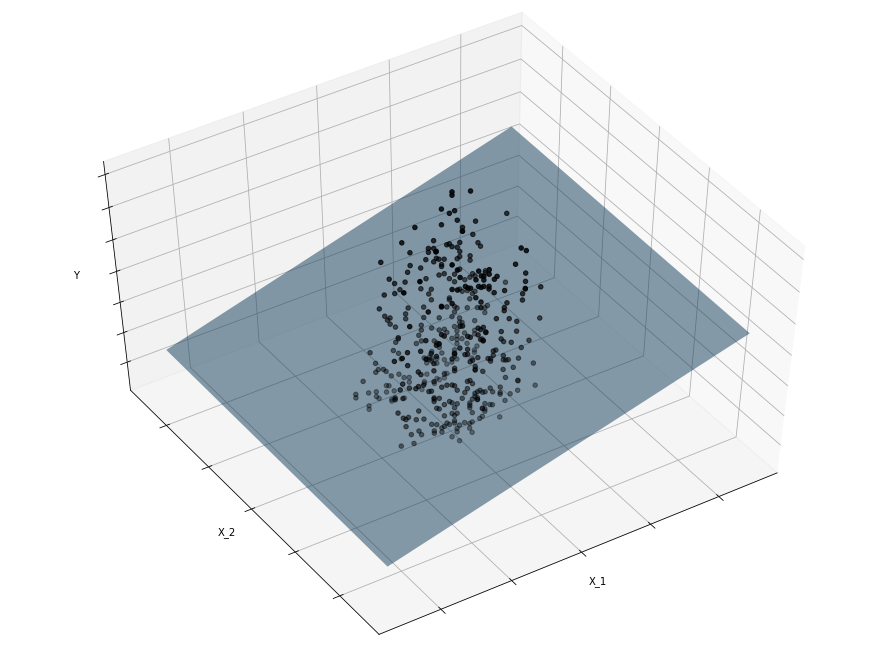

In [15]:
elev = 51.5
azim = -123
plot_figs(1, elev, azim, X_train, ols)
plt.show()

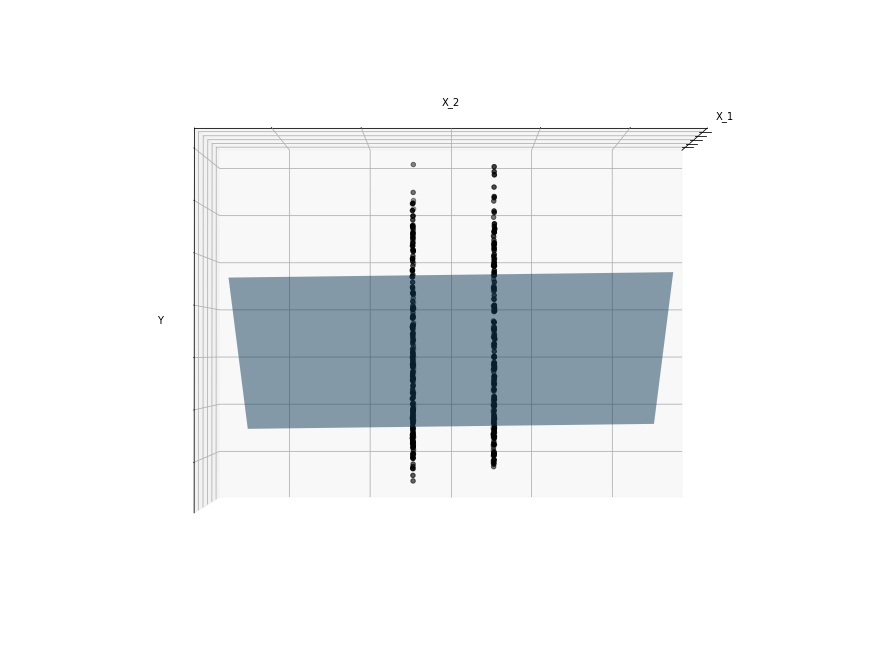

In [16]:
elev = -0.5
azim = 0
plot_figs(2, elev, azim, X_train, ols)
plt.show()

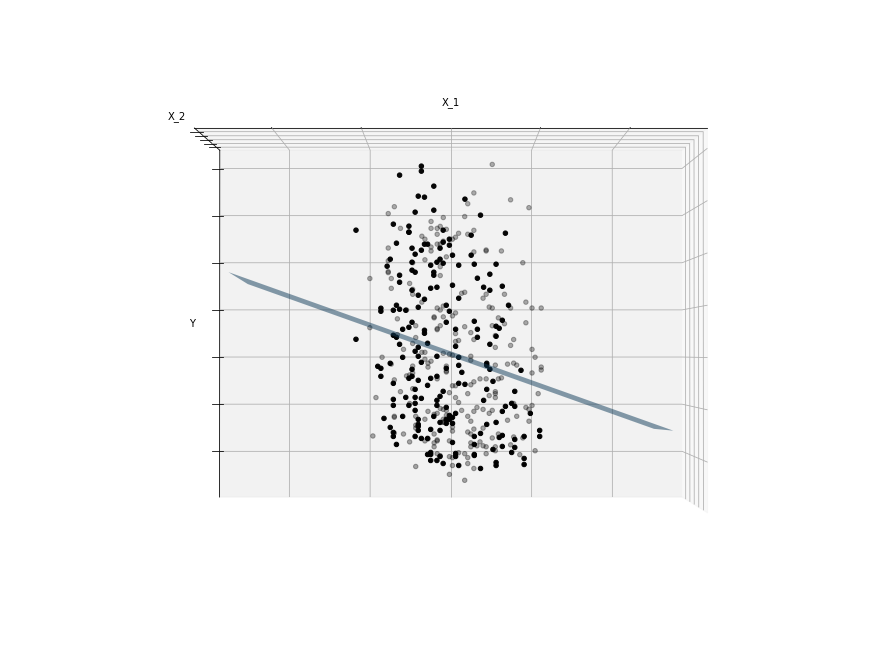

In [17]:
elev = -0.5
azim = 90
plot_figs(3, elev, azim, X_train, ols)
plt.show()

In [18]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-06 13:59:57.881996
